<center><h1> Support Vector Machines (SVM):</h1>
    <h2>Binary Classification Using a Hard-margin Linear Kernel</h2></center>
    
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Updated | 12/9/2019|

### Abstract
Using Numpy and a rudimentary, pseudo-quadratic programming solving algorithm, we designed a Support Vector Machine class in Python for linear, hard-margin, binary classification. A simple, linearly-separable, six-sample, two-dimensional dataset was used to train the model for predictions. After optimizing its parameters, we were able to train the model in $0.631 \pm 0.025$ seconds, with support vectors at worst 7.1\% off from their ideal values.

### Introduction
Vladimir Vapnik originally developed the algorithm for the Support Vector Machine (SVM) in 1963, but it was not properly noticed or realized by the machine learning (ML) community until he defected to the United States in the 1990s. Since then, this supervised learning model been improved upon and is considered a staple in classification and regression analysis problems.
    
Among other ML models, SVMs' advantages include: effective in high-dimensional feature-spaces; effective when the number of samples is less than the dimensionality; once trained, is memory efficient in its predictions (decision function); versatile, as various kernel functions can be implemented to improve the model. Applications of SVMs include: outlier detection; handwriting, text and hypertext categorization and recognition; image classification; biological sciences, such as protein and compound classification.

### Theoretical Background

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 2], [2, 1], [3, 3], [4, 4]])
Y = np.array([-1, -1, 1, 1])
O = [0], [0] # origin point
hyperplane = np.array([[0, 4.5], [4.5, 0]])
margin_m = np.array([[0, 3], [3, 0]])
margin_p = np.array([[0, 6], [6, 0]])

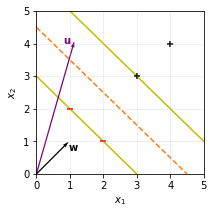

In [4]:
diff = X[2] - X[0]
u = r"$\mathbf{u}$"
w = r"$\mathbf{w}$"

plt.figure(figsize=[3, 3])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.plot(margin_m[0], margin_m[1], 'y', zorder=-1)
plt.plot(margin_p[0], margin_p[1], 'y', zorder=-1)
plt.plot(hyperplane[0], hyperplane[1], '--', c='C1', zorder=-1)
plt.scatter(X[0:2, 0], X[0:2, 1], c='r', marker='_')
plt.scatter(X[2:4, 0], X[2:4:, 1], c='k', marker='+')
plt.axis([0, 5, 0, 5])
plt.quiver(*O, 1.2, 4.2, color='purple', scale=5.3)
plt.quiver(*O, 1, 1, color='k', scale=5.2)
plt.text(0.8, 4, u, c='purple')
plt.text(X[2, 0]-2.05, X[2, 1]-2.3, w, c='k')
plt.grid(alpha=0.25)
#plt.savefig('figures/uw.png', bbox_inches='tight')
plt.show()

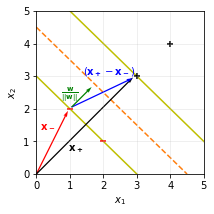

In [5]:
diff = X[2] - X[0]
x_m = r"$\mathbf{x_-}$"
x_p = r"$\mathbf{x_+}$"
delta_x = r"$(\mathbf{x_+} - \mathbf{x_-})$"
norm = r"$\frac{\mathbf{w}}{||\mathbf{w}||}$"

plt.figure(figsize=[3, 3])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.plot(margin_m[0], margin_m[1], 'y', zorder=-1)
plt.plot(margin_p[0], margin_p[1], 'y', zorder=-1)
plt.plot(hyperplane[0], hyperplane[1], '--', c='C1', zorder=-1)
plt.scatter(X[0:2, 0], X[0:2, 1], c='r', marker='_')
plt.scatter(X[2:4, 0], X[2:4:, 1], c='k', marker='+')
plt.axis([0, 5, 0, 5])
plt.quiver(*O, X[0, 0], X[0, 1], color='r', scale=5.3)
plt.quiver(*O, X[2, 0], X[2, 1], color='k', scale=5.2)
plt.quiver(X[0, 0]+.05, X[0, 1]+.05, diff[0]-.1, diff[1]-.1, color='b', scale=5.2)
plt.quiver(X[0, 0]+.05, X[0, 1]+.05, X[2, 0], X[2, 1], color='g', scale=25)
plt.text(X[0, 0]-.9, X[0, 1]-.6, x_m, c='r')
plt.text(X[2, 0]-2.05, X[2, 1]-2.3, x_p, c='k')
plt.text(X[2, 0]-1.6, X[2, 1]+.05, delta_x, c='b')
plt.text(X[0, 0]-.25, X[0, 1]+.4, norm, c='g')
plt.grid(alpha=0.25)
#plt.savefig('figures/width.png', bbox_inches='tight')
plt.show()

### Methods

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'k', -1:'r'}
        self.markers = {1: '+', -1:'_'}
        if self.visualization:
            self.fig = plt.figure(figsize=[3,3])
            self.ax = self.fig.add_subplot(1,1,1, aspect='equal')
    
    # train
    def fit(self, data, b_range=5, step_mag=3):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}
        
        transforms = [[1,1],
                      [1,-1],
                      [-1,1],
                      [-1,-1]]
        
        all_data = []
        for y_i in self.data:
            for featureset in self.data[y_i]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # support vectors y_i(x_i.w+b) = 1
        # 1.01 or better
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001,
                      self.max_feature_value * 0.0001,]
        
        # extremely expensive
        b_range_multiple = b_range # default is 5
        # we don't need to take as small steps
        # with be as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes[:step_mag]:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False # allowable for convex
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to somewhat fix this
                        # check y_i(x_i.w+b) >= 1
                        for y_i in self.data:
                            for x_i in self.data[y_i]:
                                if not y_i*(np.dot(w_t, x_i)+b) >= 1:
                                    found_option = False
                                    break
                            if not found_option:
                                break
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                                
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step
                    
            norms = sorted([n for n in opt_dict])
            # recall ||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
        
        for y_i in self.data:
            for x_i in self.data[y_i]:
                print(x_i, ', {:0.3f}'.format(y_i*(np.dot(self.w,x_i)+self.b)))
    
    def predict(self, features):
        # sign(x_i.w + b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])                       
        return classification
    
    def visualize(self, path):
        # scattering known featuresets
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i],marker=self.markers[i]) for x in data_dict[i]] for i in data_dict]
    
        # hyperplane = x.w+b
        # v = x.w+b
        # +SV = 1
        # -SV = -1
        # DB = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.01,self.max_feature_value*1.2)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
                            
        # (w.x+b) = 1
        # +SV margin-hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1) 
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'y', zorder=-1)
                            
        # (w.x+b) = -1
        # -SV margin-hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1) 
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'y', zorder=-1)
                            
        # (w.x+b) = 0
        # decision boundary hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0) 
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], '--', c='C1', zorder=-1)
        
        self.ax.set_xlim(0, 10)
        self.ax.set_ylim(0, 10)
        self.ax.set_xlabel('$x_1$')
        self.ax.set_ylabel('$x_2$')
        self.ax.grid(alpha=0.25)
        self.ax.set_axisbelow(True)
        #self.fig.savefig(path, bbox_inches='tight')

### Results

In [8]:
data_dict = {-1:np.array([[1,8],
                          [2,9],
                          [4,8]]),
              1:np.array([[4,1],
                          [9,2],
                          [7,4]])}

Optimized a step.
Optimized a step.
Optimized a step.
[1 8] , 1.899
[2 9] , 1.899
[4 8] , 1.008
[4 1] , 1.071
[9 2] , 2.259
[7 4] , 1.071


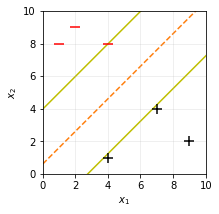

In [16]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict, b_range=5, step_mag=3)
svm.visualize('figures/train.png')

In [23]:
predict = [[0.5,1],
           [1,3],
           [3,4],
           [3,5],
           [4.5,5],
           [5,6],
           [6,5],
           [5,8]]

Optimized a step.
Optimized a step.
Optimized a step.
[1 8] , 1.899
[2 9] , 1.899
[4 8] , 1.008
[4 1] , 1.071
[9 2] , 2.259
[7 4] , 1.071


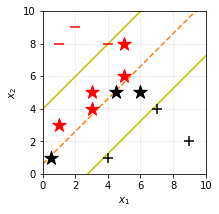

In [19]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict, b_range=5, step_mag=3)

for p in predict:
    svm.predict(p)
svm.visualize('figures/pred-5-3.png')

### Analysis

In [ ]:
svm = Support_Vector_Machine()

In [25]:
%timeit svm.fit(data=data_dict, b_range=1, step_mag=3)

604 ms ± 51.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit svm.fit(data=data_dict, b_range=2, step_mag=3)

1.24 s ± 74.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit svm.fit(data=data_dict, b_range=3, step_mag=3)

1.92 s ± 93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit svm.fit(data=data_dict, b_range=4, step_mag=3)

3.29 s ± 346 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit svm.fit(data=data_dict, b_range=5, step_mag=3)

3.62 s ± 342 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
svm = Support_Vector_Machine()

[1 8] , 6.300
[2 9] , 6.300
[4 8] , 3.600
[4 1] , 2.700
[9 2] , 6.300
[7 4] , 2.700


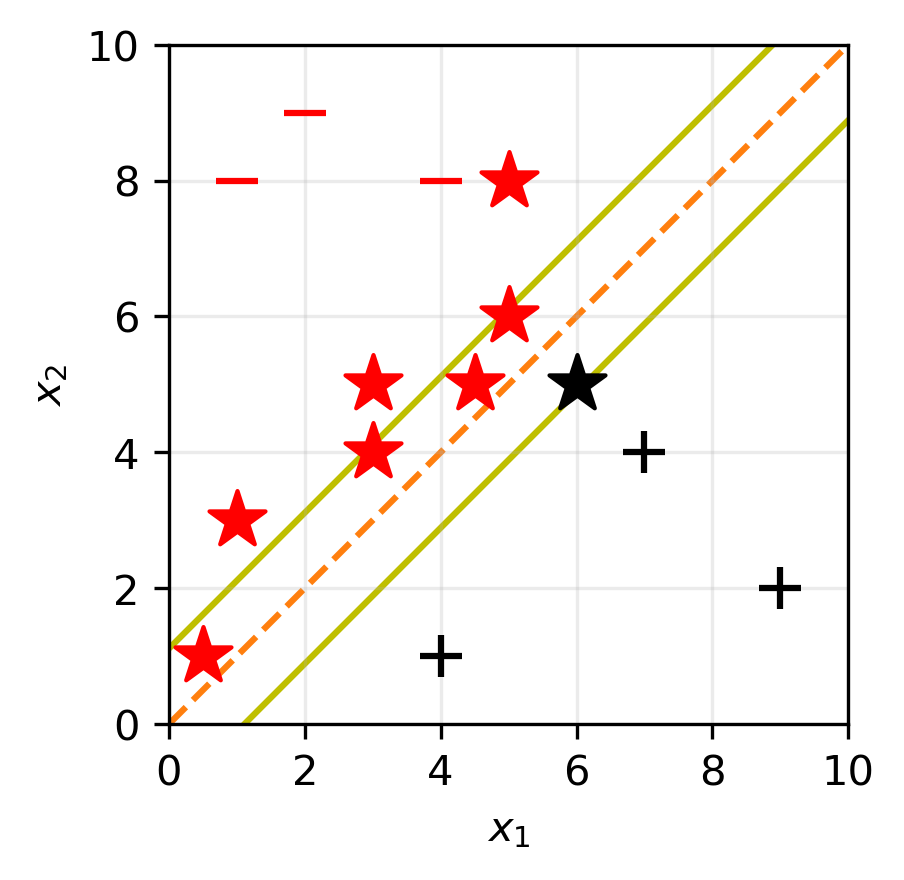

In [545]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict, b_range=1, step_mag=1)
for p in predict:
    svm.predict(p)
svm.visualize('figures/pred-1-1.png')

[1 8] , 2.520
[2 9] , 2.520
[4 8] , 1.440
[4 1] , 1.080
[9 2] , 2.520
[7 4] , 1.080


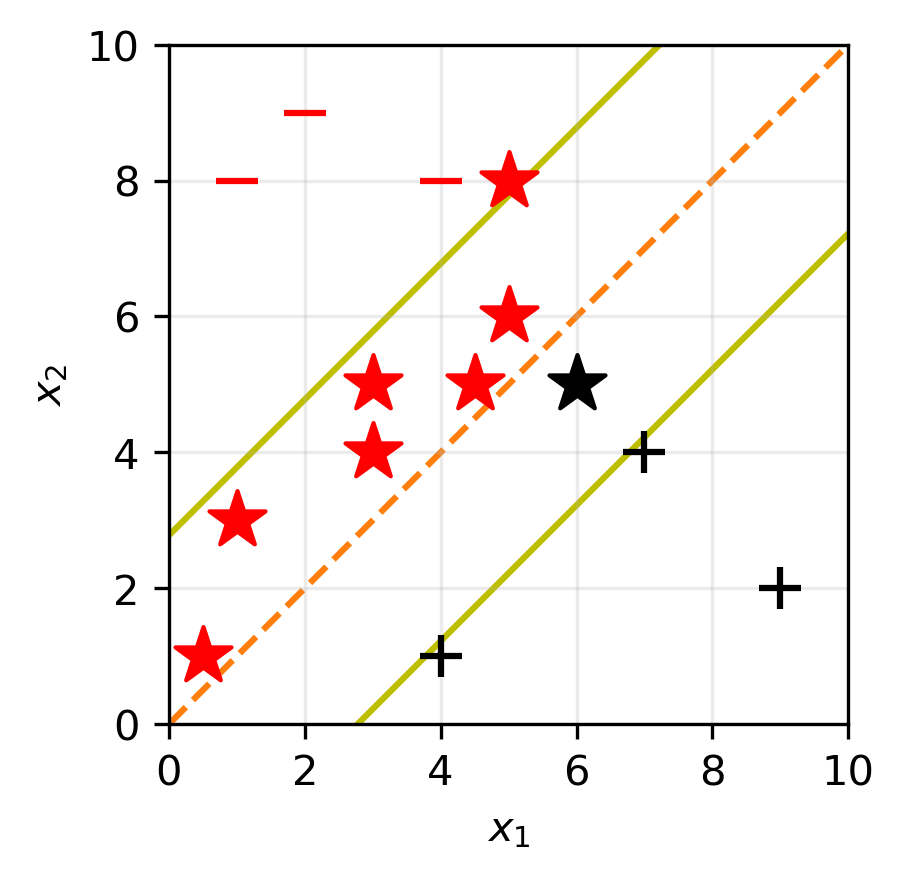

In [546]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict, b_range=1, step_mag=2)
for p in predict:
    svm.predict(p)
svm.visualize('figures/pred-1-2.png')

[1 8] , 1.899
[2 9] , 1.899
[4 8] , 1.008
[4 1] , 1.071
[9 2] , 2.259
[7 4] , 1.071


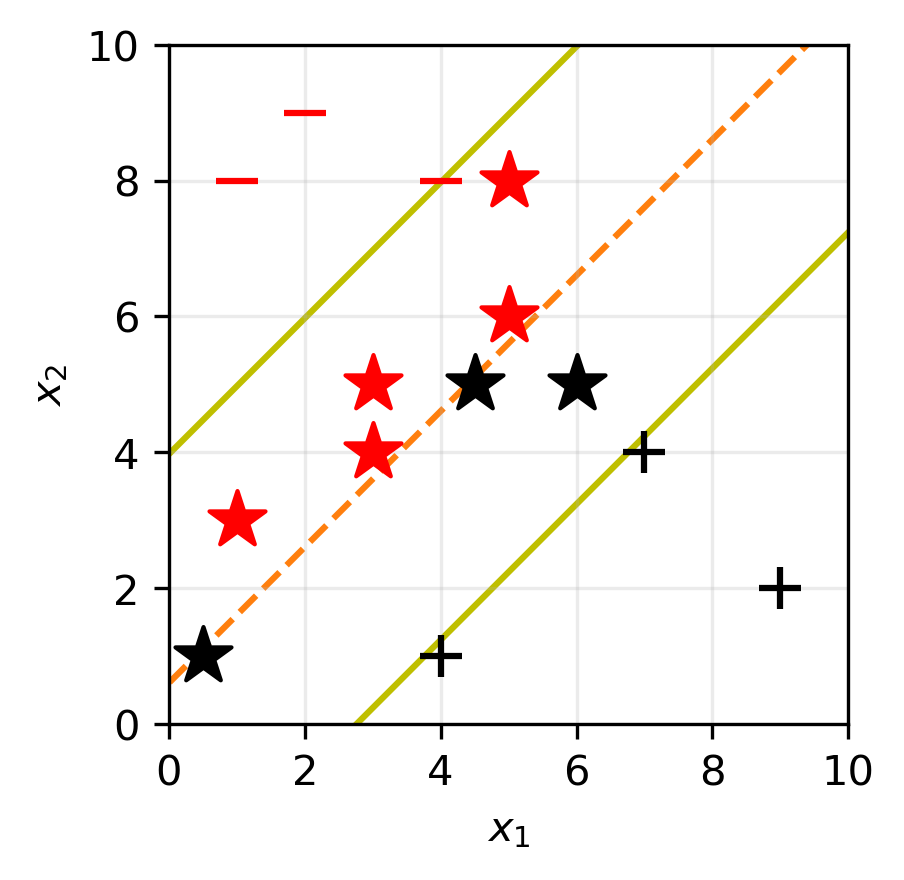

In [547]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict, b_range=1, step_mag=3)
for p in predict:
    svm.predict(p)
svm.visualize('figures/pred-1-3.png')

[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003


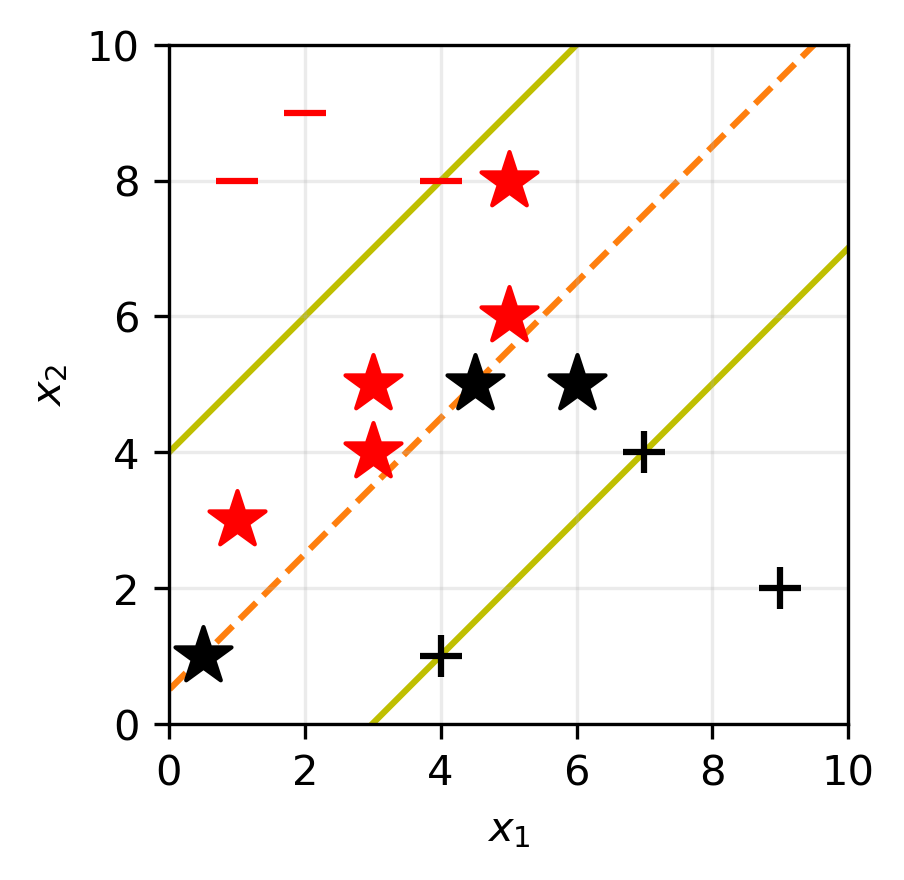

In [548]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict, b_range=1, step_mag=4)
for p in predict:
    svm.predict(p)
svm.visualize('figures/pred-1-4.png')

In [535]:
%timeit svm.fit(data=data_dict, b_range=1, step_mag=1)

13 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [536]:
%timeit svm.fit(data=data_dict, b_range=1, step_mag=2)

50.7 ms ± 975 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [537]:
%timeit svm.fit(data=data_dict, b_range=1, step_mag=3)

631 ms ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [549]:
%timeit svm.fit(data=data_dict, b_range=1, step_mag=4)

[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
[1 8] , 1.859
[2 9] , 1.859
[4 8] , 1.001
[4 1] , 1.003
[9 2] , 2.147
[7 4] , 1.003
33.3 s ± 751 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [595]:
X = [[1,8],
     [2,9],
     [4,8],
     [4,1],
     [9,2],
     [7,4]]
y = [-1, -1, -1, 1, 1, 1]

In [607]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [592]:
%timeit clf.fit(X, y)

214 µs ± 4.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [608]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [609]:
clf.support_vectors_

array([[4., 8.],
       [7., 4.]])

In [611]:
clf.predict(predict)

array([ 1, -1,  1, -1,  1, -1,  1, -1])

### Interpretation and Conclusion
We readily acknowledge the limitation of our SVM as to the kinda of data it can train from and predict, as well as its computational performance. In its current form, it can---at best---train from a _linearly separable_ dataset, with a 2-dimensional feature-space, but can reasonably classify new and unknown samples.
    
Several steps could be taken to expand the code in terms of versatility and performance. For starters, because of the way we attempt to rudimentarily solve the QP problem by transforming and testing the four possible transformations of $\vec w$, the code is currently restricted to 2-dimensional feature-spaces. As a 3-dimensional feature space would require $2^3 = 8$ exhaustive transformations, and so on for higher dimensions, we should first rewrite this portion and verify it can train with any $n$-dimensional feature-space data, so long as it is linearly separable.
    
The next important improvement would be to implement a \textit{soft-margin} calculation by introducing a \textit{hinge loss} function. As mentioned in the Theoretical Background, this would allow the SVM the flexibility to handle data that is _not_ linearly separable (which is often the case with real datasets), by introducing a trade-off between margin-width and proper boundary separation (hyperplane).
    
Finally, the ultimate goal would be to incorporate _kernel functions_. A "kernel trick" would substantially extend our SVMs applicability to a variety of datasets---even if it is non-linearly separable in its proper n-dimensional feature-space---by _transforming_ the data to higher feature-spaces where linear separability may arise. Properly doing so would also add very little computational cost to the model.
    
However, our QP problem solver, in its current and basic form, would likely not be extendable to support and and reasonably solve the QP problems involving soft-margins and kernel functions. At that point, the most logical next step would be to invoke a third-party, QP library to help solve these problems. One example is __CVXOP__, which can be used to solve convex quantum programming or Lagrange dual problems. Another popular and robust library is __LIBSVM__, which is in fact what Scikit-learn uses. 
    
General limitations of SVM machines can include a large memory footprint for extremely large datasets. _Sequential minimal optimization_ (SMO), developed in 1998 at Microsoft Research, attempts to address this by iteratively reducing the QP problem into smaller sub-problems based on sub-sets of the training data; SMO has been implemented in LIBSVM. Another disadvantage to SVMs is that they do not directly provide probability estimates, and doing so requires an expensive five-fold cross-validation. Finally, SVMs suffer from the "curse of dimensionality," in that, by resorting to higher dimensions with the kernel functions, even seemingly _dense_ data can become relatively _sparse_, making training more difficult.

### Acknowledgements
Much of the theory's progression in the Theoretical Background follows Patrick H. Winston's _MIT OpenCourseWare_ "Lecture 16: Learning: Support Vector Machines," as part of his series 6.034 on Artificial Intelligence (2010).

https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-034-artificial-intelligence-fall-2010/lecture-videos/lecture-16-learning-support-vector-machines/ 

As for the methodology, most of the techniques, structures and algorithms originate from _Python Programming Tutorial_, "Beginning SVM from Scratch in Python."

https://pythonprogramming.net/svm-in-python-machine-learning-tutorial/?completed=/svm-constraint-optimization-machine-learning-tutorial/.